In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import textwrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [87]:
data = pd.read_csv("Ecommerce Customers")

In [88]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [90]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

C:\Users\cgasp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


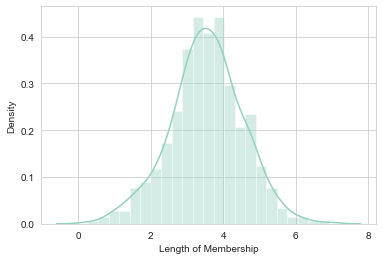

In [95]:
sns.distplot(data['Length of Membership']);

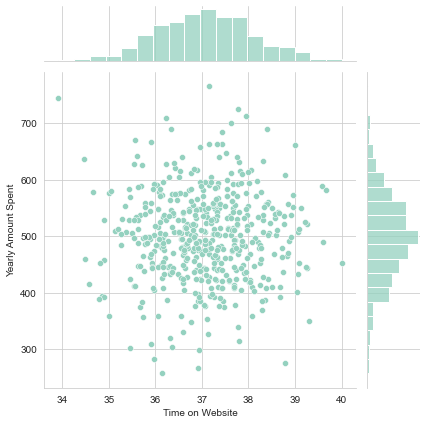

In [91]:
# More time on site, more money spent.
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data)

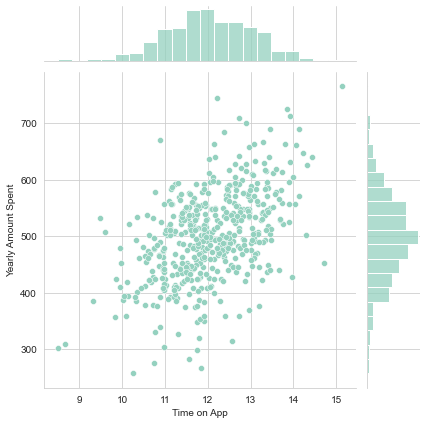

In [92]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data)

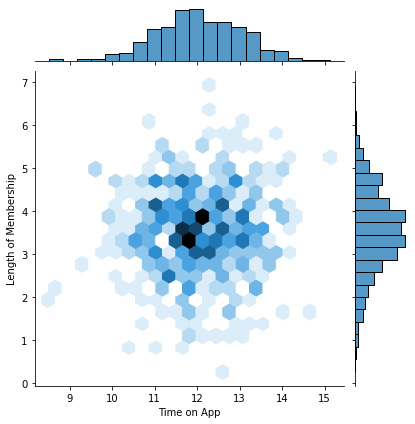

In [50]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=data)

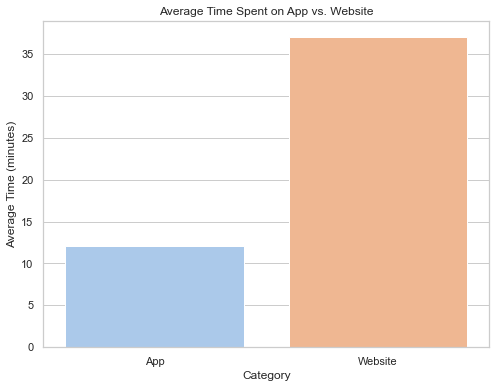

In [102]:
average_time = [data['Time on App'].mean(), data['Time on Website'].mean()]  # Average time on app and website in minutes
categories = ['App', 'Website']

# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=average_time, palette="pastel")
plt.title("Average Time Spent on App vs. Website")
plt.xlabel("Category")
plt.ylabel("Average Time (minutes)")
plt.show()

[Text(0.5, 0, 'Avg.\nSession\nLength'),
 Text(1.5, 0, 'Time on\nApp'),
 Text(2.5, 0, 'Time on\nWebsite'),
 Text(3.5, 0, 'Length of\nMembership'),
 Text(4.5, 0, 'Yearly\nAmount\nSpent')]

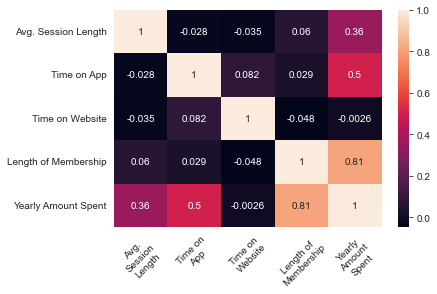

In [85]:
heatmap = sns.heatmap(data.corr(), annot = True)
# Rotate the x-axis tick labels
xtick_labels = heatmap.get_xticklabels()
new_xtick_labels = [textwrap.fill(label.get_text(), 10) for label in xtick_labels]
heatmap.set_xticklabels(new_xtick_labels, rotation=45, ha='center', fontsize=10)

C:\Users\cgasp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cgasp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cgasp\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


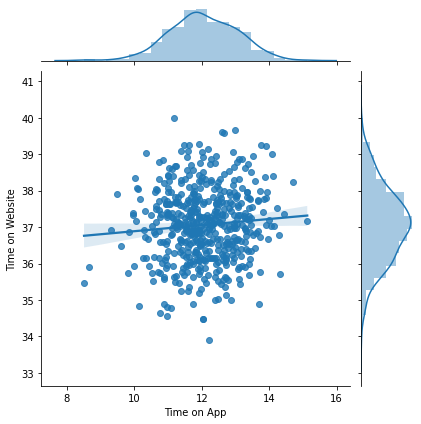

In [52]:
g = sns.JointGrid(x="Time on App", y = 'Time on Website', data=data)
g = g.plot(sns.regplot, sns.distplot)

Yearly amount spent is highly correlated to Length of membership as well as Time on App and interestingly is is neatively correlated to time on website.

Average Session Length also correlates positively with Yearly Amount spent hence the compay if makes interactive contents to engage users more hence Yearly Amount spent by user will increase.

Website traffic doesn't bring much sales as time spent on website is negatively correlated to yearly amount spent. On the contrary time spent on the mobile app brings more sale to the company. Though total time spent on mobile is less than total time spent on the website. There can be many reasons to support it like website every time asks for login, website may work slow while ordering, etc...

Other inference which is drawn is as the Length of Membership increases the yearly spent of a customer increases, this tells customer trusts the company or he has good experience on the products they ordered before.

Average session length also shows positive correlation with the yearly amount spent hence company should focus on creating and deploying more attractive content to drive in more sales.

## Training and Testing Data

In [53]:
y = data['Yearly Amount Spent']
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [54]:
# normalization
minmaxscaler = MinMaxScaler()
XX = minmaxscaler.fit_transform(X)
XX

array([[0.75142474, 0.62662002, 0.9298161 , 0.57310099],
       [0.36230641, 0.39301565, 0.55080076, 0.35986913],
       [0.52495281, 0.42637758, 0.52480294, 0.57639624],
       ...,
       [0.47135427, 0.45193054, 0.72541233, 0.70472157],
       [0.57362466, 0.58669942, 0.48039367, 0.3106342 ],
       [0.63317755, 0.5908369 , 0.30488705, 0.37056019]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=101)

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [171.66616628 255.42216789   1.15982222 407.67685316]


In [59]:
predictions = lm.predict(X_test)

In [60]:
x_test_var1 = [i[0] for i in X_test]
x_test_var1

[0.4018903025207301,
 0.38520828254361295,
 0.2810792909767583,
 0.5748614066833317,
 0.41805887039130774,
 0.5708754864687773,
 0.40002707066396503,
 0.8226106890640157,
 0.766068304659572,
 0.43113439452924496,
 0.4107499788125102,
 0.630892877972431,
 0.4432692545865198,
 0.5769554996959991,
 0.7328073182616794,
 0.45931500729239616,
 0.7345572560699747,
 0.47838638689199886,
 0.6053110050371817,
 0.4128118507583549,
 0.0,
 0.6885207272869804,
 0.7358446867966926,
 0.4422612824083858,
 0.47732778218882643,
 0.6137128966079421,
 0.5429693758333318,
 0.44844635759436624,
 0.4903990379461103,
 0.3937250642396286,
 0.46697715248248617,
 0.8334583725153024,
 0.7059884764338644,
 0.7663340050991518,
 0.5362719590369709,
 0.6451559415500645,
 0.5945948959633922,
 0.47062320232853505,
 0.5943774103873247,
 0.36559756003144717,
 0.6190431834964603,
 0.3685191347960668,
 0.5377241491230809,
 0.4651197304294312,
 0.786509388760031,
 0.44889651590424773,
 0.7081681461764155,
 0.5210598239916813

Text(0, 0.5, 'Predicted Y')

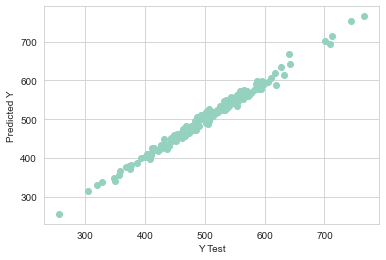

In [94]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430843
MSE: 79.8130516509747
RMSE: 8.933815066978648


C:\Users\cgasp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


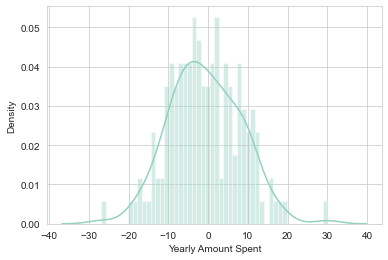

In [83]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.distplot((y_test-predictions),bins=50);